# Partie 3 : Premiers pas vers les méthodes de ML supervisé en python

L'idée de cette partie est de tester différentes méthodes d'apprentissage statistique supervisées usuelles. Pour cela nous allons utiliser les données issues de la table de description des individus interviewés lors de l'enquête INCA 3 sur la consommation et les habitudes alimentaires des français.

L'objectif consistera à prédire au mieux l'IMC d'un individu grâce aux diverses informations que nous détenons sur la personne. Contrairement à la partie 2 sur le clustering, il s'agit ici de d'apprentissage supervisé car nous avons en notre possessions des données labélisées. Parmi les méthodes d'apprentissages supervisé on distingue généralement deux grandes familles que sont la classification et la régression. Ici nous sommes confronté à un problème de régression puisque nous souhaitons prédire l'indice de masse corporelle exacte. Pour cela nous allons tester plusieurs méthodes différentes afin d'analyser lesquelles sont les plus efficaces sur les données que nous possédons.


## 1. Prise en main des données

Les données de l'enquête INCA3 sont disponibles sur *Data.gouv* à l'adresse suivante : https://www.data.gouv.fr/fr/datasets/donnees-de-consommations-et-habitudes-alimentaires-de-letude-inca-3/. Cette table contient les données des questionnaires face-à-face relatifs aux volets « Socio-économique » et « Mesures anthropométriques » et des données des questionnaires auto-administrés relatifs aux volets « Etat de santé » et « Tabagisme ». 

Elle regroupe les informations suivantes : caractéristiques socio-démographiques de l’individu (ou de son représentant dans le cas des enfants), caractéristiques
socio-démographiques de la personne de référence du foyer, niveau de vie du foyer, insécurité alimentaire, caractéristiques anthropométriques (poids, taille, indice
de masse corporelle, statut pondéral) ; statut vis-à-vis d’allergies ou d’intolérances alimentaires, types de régimes alimentaires, types d’allergies ou d’intolérances
alimentaires, régimes et histoire pondérale, statut vis-à-vis de la grossesse, de l’allaitement et de la ménopause (uniquement pour les femmes de 15 ans et plus),
statut tabagique ; indicateurs de sous ou sur-déclaration en termes de consommations alimentaires.

Nous avons préalablement selectionné un grand nombre de variables issues de cette base que nous avons ensuite enregistré dans un bucket s3. Vous pouvez les télécharger grâce à ma commande suivante :

In [1]:
import pandas as pd
import pyarrow.parquet as pq
from pyarrow import fs

In [2]:
s3 = fs.S3FileSystem(endpoint_override='https://'+'minio.lab.sspcloud.fr')

bucket = "projet-funathon"
path_data =  "2023/sujet3/diffusion/description_individu_inca.parquet"

df = pq.ParquetDataset(f'{bucket}/{path_data}', filesystem=s3).read_pandas().to_pandas()

In [3]:
df.shape

(5841, 118)

<i  class="fa fa-pencil"></i> On peut tout d'abord remarquer que le jeu de données ne semble, a priori, pas idéal pour réaliser des méthodes de machine learning très complexes avec beaucoup de paramètres à estimer. Il arrive très souvent que des méthodes plus classiques soient aussi, voire plus, efficaces que les méthodes d'apprentissage statistique. Cependant ce jeu de données peut tout à fait être utilisé à des fins pédagogiques pour comprendre les principes généraux.

In [4]:
df.head(10)

,NOIND,imc,sex_PS,tage_PS,tage_PS_mois,diplome_interv,etude_4cl_interv,situ_prof_5cl_interv,atrav_interv,trav_nuit_interv,...,nb_cigares_sem,nb_cigares_nsp,nb_pipes_jour,nb_pipes_sem,nb_pipes_nsp,fume_age_debut,fume_age_debut_nsp,fume_age_arret,fume_age_arret_nsp,bmr_kcal
0,110100101,18.282312,1,7,NaN,7.0,1,3,2.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1378.0930
1,110100701,23.624619,2,8,NaN,7.0,1,1,NaN,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1352.7802
2,110100801,29.949701,1,8,NaN,7.0,1,1,NaN,4.0,...,NaN,NaN,0.0,NaN,NaN,25.0,NaN,33.0,NaN,1630.9735
3,110101201,26.141914,1,8,NaN,10.0,3,1,NaN,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1749.4603
4,110101401,22.420361,2,9,NaN,7.0,1,4,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1090.1117
5,110101601,24.034611,2,8,NaN,3.0,1,1,NaN,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,110101901,26.258423,1,7,NaN,9.0,2,1,NaN,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,110200101,26.592670,1,8,NaN,11.0,4,1,NaN,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,110300301,20.939625,1,8,NaN,7.0,1,2,1.0,NaN,...,NaN,NaN,0.0,NaN,NaN,16.0,NaN,NaN,NaN,1441.6642
9,110300501,28.601023,1,9,NaN,6.0,1,4,1.0,NaN,...,NaN,NaN,0.0,NaN,NaN,20.0,NaN,46.0,NaN,1655.5555


Tout d'abord, commençons par définir quelques constantes qui nous seront utiles pour la suite, à savoir : 
- La variable d'intérêt que nous cherchons à prédire `TARGET_VARIABLE`
- La variable correspondant au numéro d'individu `NOIND`
- Un nombre arbitraire pour afin de simplifier la réplicabilité de nos expérimentations `SEED`

In [5]:
TARGET_VARIABLE="imc"
INDEX="NOIND"
SEED=2023

**Question 1:** Comme souvent en science de la données, la partie la plus fastidieuse consiste à analyser les données à notre disposition. En vous aidant du dictionnaire accessible [ici](https://static.data.gouv.fr/resources/donnees-de-consommations-et-habitudes-alimentaires-de-letude-inca-3/20210128-192017/notice-utilisateurs-donnees-inca3-data.gouvjanv21.pdf) déterminer l'ensemble des variables numériques. Les autres variables seront considérées comme des variables catégorielles.

In [9]:
NUMERICAL = [
# REMPLIR ICI
]

CATEGORICAL = [x for x in df.columns if x not in NUMERICAL + [INDEX, TARGET_VARIABLE]]

FEATURES = NUMERICAL + CATEGORICAL

<details>
<summary>
    <font size=3 color="red"><b>Click to see the answer </b></font>
</summary>

```python
NUMERICAL = [
    "IA_score",
    "bmr_kcal",
    'nbenf',
    "enceinte_nbmois",
    'nb_cigarettes_jour',
    'nb_cigarettes_sem',
    'nb_cigares_jour',
    'nb_cigares_sem',
    'nb_pipes_jour',
    'nb_pipes_sem',
    'fume_age_debut',
    'fume_age_arret',
    'allaite_nbsem',
    "regime_nb_2dernann",
    "regime_nb_anter2dernann"
]

CATEGORICAL = [x for x in df.columns if x not in NUMERICAL + [INDEX, TARGET_VARIABLE]]

FEATURES = NUMERICAL + CATEGORICAL
```

</details>

Une pratique courante dans les projets de machine learning c'est de commencer par spécifier une fraction de notre jeu données comme un **échantillon de test**. Cet échantillon va être utilisé à la toute fin du projet de sorte à évaluer la performance de nos modèles sur des données qu'il n'aura jamais vu auparavant. L'échantillon restant, celui **d'entrainement**, est lui utilisé pour entrainer les algorithmes et comparer leurs performances. L'idée derrière cette division est de réduire le risque de sur-apprentissage de notre modèle et d'estimer une erreur de généralisation.

**Question 2:** Créer les variables `y` et `X` correspondant respectivement à la variable d'intérêt et aux différentes features de notre jeu de données. Diviser ensuite ce jeu de données en un échantillon de train et de test en utilisant la fonction `train_test_split` de [scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html). Ne pas oublier de spécifier le `random_state`.

In [7]:
from sklearn.model_selection import train_test_split
# Votre code ici

<details>
<summary>
    <font size=3 color="red"><b>Click to see the answer </b></font>
</summary>

```python
X = df[FEATURES]
y = df[TARGET_VARIABLE]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=SEED)
```

</details>

## 2. Un modèle de régression linéaire simple

**Question 3:** Avant d'étudier différentes méthodes d'apprentissage statistique commençons par réaliser une régression linéaire classique. Pour cela, sélectionnez un petit nombre de variables $(< 10)$ qui vous semble pertinent pour prédire l'indice de masse corporelle d'une personne. Prenez à la fois des variables numériques et catégorielles.

In [ ]:
CATEGORICAL_REGRESSION = [
# A REMPLIR
]

NUMERICAL_REGRESSION = [
# A REMPLIR
]

FEATURES_REGRESSION = NUMERICAL_REGRESSION + CATEGORICAL_REGRESSION

<details>
<summary>
    <font size=3 color="red"><b>Click to see the answer </b></font>
</summary>

```python
CATEGORICAL_REGRESSION = [
    "sex_PS",
    "tage_PS",
   # "tage_PS_mois",
   # "diplome_interv",
   # "soins",
   # "situ_fin_3cl",
    "revenu",
    "situ_alim_statut",
   # "IA_statut",
   # "statnut",
    "poids_perception" ,
   # "menopause",
    "enceinte",
   # "enceinte_12dermois",
   # 'etude_4cl_interv',
   # 'situ_prof_5cl_interv',
   # 'atrav_interv',
   # 'trav_nuit_interv',
   # 'trav_nuit_2cl_interv',
   # 'PCS_8cl_interv',
   # 'PCS_4cl_interv',
   # 'tps_travail_interv',
   # 'vacances_interv',
   # 'RUC_4cl',
]

NUMERICAL_REGRESSION = [
    "IA_score",
   # "bmr_kcal",
   # 'nbenf',
    "enceinte_nbmois",
    "nb_prise_10kg"
]

FEATURES_REGRESSION = NUMERICAL_REGRESSION + CATEGORICAL_REGRESSION
```

</details>

In [9]:
X_train_regression = X_train[FEATURES_REGRESSION]
X_test_regression = X_test[FEATURES_REGRESSION]

In [10]:
X_train_regression.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4672 entries, 4763 to 4962
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   IA_score          781 non-null    float64
 1   enceinte_nbmois   14 non-null     float64
 2   nb_prise_10kg     1699 non-null   float64
 3   sex_PS            4672 non-null   int64  
 4   tage_PS           4672 non-null   int64  
 5   revenu            4672 non-null   int64  
 6   situ_alim_statut  4672 non-null   int64  
 7   poids_perception  2572 non-null   float64
 8   enceinte          666 non-null    float64
dtypes: float64(5), int64(4)
memory usage: 365.0 KB


Ces informations nous indiquent qu'il y a plusieurs variables qui contiennent des valeurs manquantes. Afin de ne pas supprimer les lignes qui contiennent des valeurs manquantes nous allons tenter de les imputer. Plusieurs méthodes d'imputations peuvent être réalisées :

- **Pour les variables numériques:** Il est courant de remplacer les variables manquantes par la moyenne ou la médiane de l'échantillon.
- **Pour les variables catégorielles:** On peut remplacer les variables manquantes par le moden c'est à dire la valeur la plus fréquente dans l'échantillon ou en créant une nouvelle categorie reflétant une valeur manquante.

D'autres méthodes qui requiert plus de modélisation sont également possible comme réaliser une régression afin de prédire les valeurs manquantes grâce aux autres features ou  utiliser un algorithme de K plus proche voisin. Toutes ces méthodes ont à la fois leurs avantages et leurs inconvénients, il est important de déterminer celle qui est la plus approprié pour le problème que vous souhaitez résoudre.

**Question 4:** Pour faire simple, nous allons remplacer les valeurs manquantes des variables numériques par la médiane et pour celles des variables catégorielles nous allons créer une nouvelle catégorie qui sera égale à $-1$. Ce dernier choix vous semble t-il approprié ?

**Question 5:** En vous aidant de la (documentation)[https://scikit-learn.org/stable/modules/classes.html#module-sklearn.impute] de scikit learn , créez ces deux *Imputer*.

In [ ]:
from sklearn.impute import SimpleImputer
import numpy as np

minus_one_imputer = # YOUR CODE
median_imputer = # YOUR CODE

<details>
<summary>
    <font size=3 color="red"><b>Click to see the answer </b></font>
</summary>

```python
from sklearn.impute import SimpleImputer
import numpy as np

minus_one_imputer = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value=-1)
median_imputer = SimpleImputer(missing_values=np.nan, strategy='median')

zero_imputer = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value=0)
```

</details>

**Question 6:** Analysez les modalités de la variables `enceinte_nbmois`, une imputation par la moyenne vous semble-t-elle justifiée ? Si non, proposez une autre imputation. Existe t-il d'autres variables dans ce cas ?

<details>
<summary>
    <font size=3 color="red"><b>Click to see the answer </b></font>
</summary>

```python
pd.unique(X_train_regression["enceinte_nbmois"])

# Les valeurs manquantes correspondent plutôt à la modalité "pas enceinte", il est donc plus judicieux de remplacer les valeurs manquantes par 0.
zero_imputer = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value=0)
```

</details>

Une étape très importante lorsqu'on utilise des méthodes de machine learning est la standardisation des données afin de mettre toutes les variables à la même échelle. Lorsque les variables ont des échelles différentes, certaines peuvent dominer les autres dans le processus d'apprentissage, ce qui peut fausser les résultats. Plusieurs méthodes de standardisation peuvent être utilisées, les deux plus courantes sont: 
- la normalisation standard : $z = \frac{x - \bar{x}}{\sigma}$
- la normalisation 0-1 : $z = \frac{x - min}{max - min}$

Nous pouvons donc créer une pipeline dans laquelle nos *features* passeront afin de subir diverses transformations. En l'occurence, nous souhaitons que nos les valeurs manquantes *features* soient imputées et que ces dernières soit standardisées. Pour cela nous pouvons utiliser la fonction `make_pipeline`.

In [17]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

numerical_zero = make_pipeline(zero_imputer, StandardScaler())
numerical_median = make_pipeline(median_imputer, StandardScaler())
categorical_encoder = make_pipeline(minus_one_imputer)

Une fois nos pipelines définies ils faut déterminer quelles *features* passent par quelles *pipelines*. Dans notre cas, on souhaite que les variables catégorielles passent par la pipeline spécifique à celles-ci et les variables numériques par la pipeline qui impute soit par la médiane, soit par 0. Pour cela on doit utiliser la fonction  

In [ ]:
preprocessor_regression = ColumnTransformer(
    transformers=[
        ("numerical_zero", numerical_zero, ["enceinte_nbmois", "nb_prise_10kg"]),
        ("numerical_median", numerical_median, [x for x in NUMERICAL_REGRESSION if x not in  ["enceinte_nbmois", "nb_prise_10kg"]]),
        ("categorical", categorical_encoder, CATEGORICAL_REGRESSION)
    ]
)

In [13]:
X_train_regression[CATEGORICAL_REGRESSION]

,sex_PS,tage_PS,tage_PS_mois,diplome_interv,soins,situ_fin_3cl,revenu,situ_alim_statut,IA_statut,statnut,...,etude_4cl_interv,situ_prof_5cl_interv,atrav_interv,trav_nuit_interv,trav_nuit_2cl_interv,PCS_8cl_interv,PCS_4cl_interv,tps_travail_interv,vacances_interv,RUC_4cl
4763,2,9,NaN,7.0,1,2,15,1,0,4.0,...,1,4,1.0,NaN,NaN,7,4,1.0,4,NaN
4655,1,7,NaN,10.0,2,2,5,2,0,1.0,...,3,1,NaN,4.0,2.0,4,2,1.0,2,1.0
3429,1,6,NaN,9.0,2,2,15,1,0,1.0,...,2,1,NaN,3.0,2.0,1,1,1.0,1,NaN
3965,2,8,NaN,9.0,2,2,7,1,0,4.0,...,2,5,1.0,NaN,NaN,8,4,1.0,1,1.0
4442,1,4,NaN,11.0,2,2,12,1,0,1.0,...,4,1,NaN,4.0,2.0,5,3,1.0,1,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4155,1,4,NaN,10.0,2,2,15,1,0,1.0,...,3,1,NaN,4.0,2.0,5,2,1.0,1,NaN
885,2,5,NaN,7.0,2,3,2,1,0,1.0,...,1,2,1.0,NaN,NaN,1,1,2.0,2,1.0
2750,2,9,NaN,10.0,2,1,14,1,0,1.0,...,3,4,1.0,NaN,NaN,7,4,1.0,1,NaN
5671,1,3,NaN,8.0,2,2,9,2,0,0.0,...,2,1,NaN,4.0,2.0,1,1,2.0,1,2.0


In [16]:
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, RidgeCV, Ridge
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA


In [12]:
#CATEGORICAL_REGRESSION_IMPUT = ["tage_PS_mois", "diplome_interv", "poids_perception", "menopause", "enceinte", "enceinte_12dermois", "atrav_interv", "trav_nuit_interv", "trav_nuit_2cl_interv", "RUC_4cl", "tps_travail_interv"]

In [17]:
zero_imputer = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value=0)
minus_one_imputer = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value=-1)
median_imputer = SimpleImputer(missing_values=np.nan, strategy='median')

numerical_zero = make_pipeline(zero_imputer, StandardScaler())
numerical_median = make_pipeline(median_imputer, StandardScaler())
categorical_encoder = make_pipeline(minus_one_imputer)

preprocessor_regression = ColumnTransformer(
    transformers=[
        ("numerical_zero", numerical_zero, ["enceinte_nbmois", "nb_prise_10kg"]),
        ("numerical_median", numerical_median, [x for x in NUMERICAL_REGRESSION if x not in  ["enceinte_nbmois", "nb_prise_10kg"]]),
        ("categorical", categorical_encoder, CATEGORICAL_REGRESSION)
    ]
)

In [23]:
data_preprocessed = pd.DataFrame(preprocessor_regression.fit_transform(X_train_regression), columns=preprocessor_regression.get_feature_names_out())
data_preprocessed

,numerical_zero__enceinte_nbmois,numerical_zero__nb_prise_10kg,numerical_median__IA_score,numerical_median__bmr_kcal,numerical_median__nbenf,categorical__sex_PS,categorical__tage_PS,categorical__tage_PS_mois,categorical__diplome_interv,categorical__soins,...,categorical__etude_4cl_interv,categorical__situ_prof_5cl_interv,categorical__atrav_interv,categorical__trav_nuit_interv,categorical__trav_nuit_2cl_interv,categorical__PCS_8cl_interv,categorical__PCS_4cl_interv,categorical__tps_travail_interv,categorical__vacances_interv,categorical__RUC_4cl
0,-0.052955,-0.720455,-0.125994,-0.012417,-1.021049,2.0,9.0,-1.0,7.0,1.0,...,1.0,4.0,1.0,-1.0,-1.0,7.0,4.0,1.0,4.0,-1.0
1,-0.052955,-0.720455,-1.635165,-0.012417,-1.021049,1.0,7.0,-1.0,10.0,2.0,...,3.0,1.0,-1.0,4.0,2.0,4.0,2.0,1.0,2.0,1.0
2,-0.052955,-0.720455,-0.125994,-0.012417,-0.150231,1.0,6.0,-1.0,9.0,2.0,...,2.0,1.0,-1.0,3.0,2.0,1.0,1.0,1.0,1.0,-1.0
3,-0.052955,0.396878,-1.635165,1.402878,1.591405,2.0,8.0,-1.0,9.0,2.0,...,2.0,5.0,1.0,-1.0,-1.0,8.0,4.0,1.0,1.0,1.0
4,-0.052955,-0.720455,-0.125994,-0.818666,1.591405,1.0,4.0,-1.0,11.0,2.0,...,4.0,1.0,-1.0,4.0,2.0,5.0,3.0,1.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4667,-0.052955,-0.720455,-0.125994,-0.877025,-0.150231,1.0,4.0,-1.0,10.0,2.0,...,3.0,1.0,-1.0,4.0,2.0,5.0,2.0,1.0,1.0,-1.0
4668,-0.052955,-0.720455,-0.125994,-0.012417,0.720587,2.0,5.0,-1.0,7.0,2.0,...,1.0,2.0,1.0,-1.0,-1.0,1.0,1.0,2.0,2.0,1.0
4669,-0.052955,1.514211,-0.125994,-0.786226,-1.021049,2.0,9.0,-1.0,10.0,2.0,...,3.0,4.0,1.0,-1.0,-1.0,7.0,4.0,1.0,1.0,-1.0
4670,-0.052955,-0.720455,-1.635165,-1.669866,-0.150231,1.0,3.0,-1.0,8.0,2.0,...,2.0,1.0,-1.0,4.0,2.0,1.0,1.0,2.0,1.0,2.0


[Text(0.5, 0, 'numerical_zero__enceinte_nbmois'),
 Text(2.5, 0, 'numerical_median__IA_score'),
 Text(4.5, 0, 'numerical_median__nbenf'),
 Text(6.5, 0, 'categorical__tage_PS'),
 Text(8.5, 0, 'categorical__diplome_interv'),
 Text(10.5, 0, 'categorical__situ_fin_3cl'),
 Text(12.5, 0, 'categorical__situ_alim_statut'),
 Text(14.5, 0, 'categorical__statnut'),
 Text(16.5, 0, 'categorical__menopause'),
 Text(18.5, 0, 'categorical__enceinte_12dermois'),
 Text(20.5, 0, 'categorical__situ_prof_5cl_interv'),
 Text(22.5, 0, 'categorical__trav_nuit_interv'),
 Text(24.5, 0, 'categorical__PCS_8cl_interv'),
 Text(26.5, 0, 'categorical__tps_travail_interv'),
 Text(28.5, 0, 'categorical__RUC_4cl')]

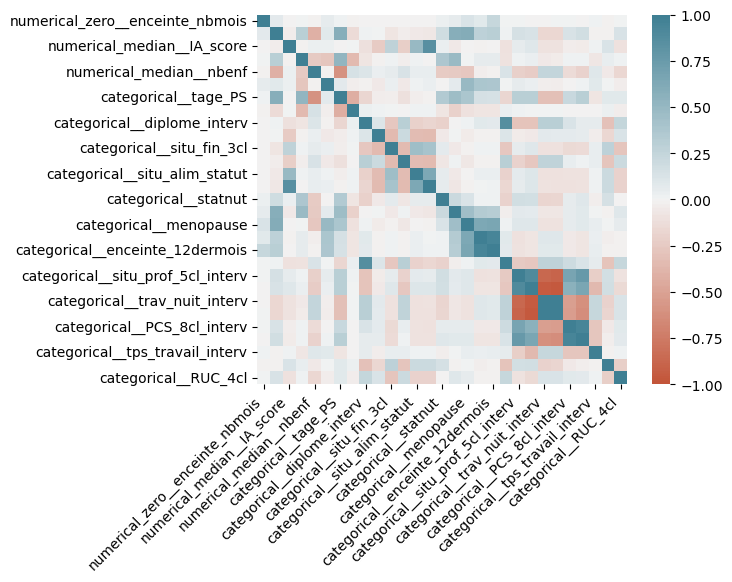

In [24]:
# Compute the correlation matrix
corr = data_preprocessed.corr()

ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
    )

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)

In [25]:
pipe_lr = Pipeline([
    ('preprocessor', preprocessor_regression), 
    ('regression', LinearRegression())
])


In [26]:
lr = pipe_lr.fit(X_train_regression, y_train)

In [27]:
y_pred = lr.predict(X_test_regression)


In [28]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Le RMSE sur le jeu de test est : {round(rmse, 4)}")

Le RMSE sur le jeu de test est : 2.1036


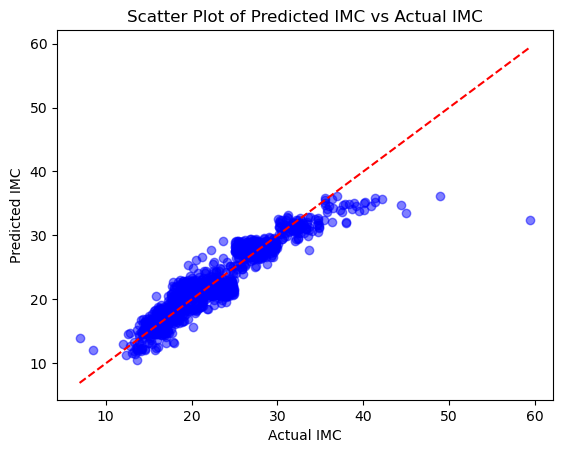

In [29]:
# Create the scatter plot
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)

# Add labels and title
plt.xlabel('Actual IMC')
plt.ylabel('Predicted IMC')
plt.title('Scatter Plot of Predicted IMC vs Actual IMC')

# Add a diagonal line for reference
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')

# Display the plot
plt.show()


# 3. Random forest Regression


Comme enceinte nb mois, certains coonne une valeur manquante = 0 donc il ne faut pas prendre la médiane

In [33]:
NUMERICAL_0_IMPUT = ["enceinte_nbmois", "nb_prise_10kg", "nb_cigarettes_jour",  "nb_cigarettes_sem", "nb_cigares_jour", "nb_cigares_sem", "nb_pipes_jour", "nb_pipes_sem", "allaite_nbsem", "regime_nb_2dernann", "regime_nb_anter2dernann"]

In [34]:
zero_imputer = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value=0)
minus_one_imputer = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value=-1)

numerical_zero = make_pipeline(zero_imputer, StandardScaler())
numerical_median = make_pipeline(median_imputer, StandardScaler())

categorical_encoder = make_pipeline(minus_one_imputer)

preprocessor = ColumnTransformer(
    transformers=[
        ("numerical_zero", numerical_zero, NUMERICAL_0_IMPUT),
        ("numerical_median", numerical_median, [x for x in NUMERICAL if x not in NUMERICAL_0_IMPUT]),
        ("categorical", categorical_encoder, CATEGORICAL)
    ]
)


In [35]:
pipe_rfr = Pipeline([
    ('preprocessor', preprocessor), 
    ('regression', RandomForestRegressor(random_state=SEED))
])


In [36]:
pipe_rfr['regression'].get_params()


{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 2023,
 'verbose': 0,
 'warm_start': False}

In [67]:
pd.DataFrame(preprocessor.fit_transform(X_train), columns=preprocessor.get_feature_names_out())

,numerical_zero__enceinte_nbmois,numerical_zero__nb_prise_10kg,numerical_zero__nb_cigarettes_jour,numerical_zero__nb_cigarettes_sem,numerical_zero__nb_cigares_jour,numerical_zero__nb_cigares_sem,numerical_zero__nb_pipes_jour,numerical_zero__nb_pipes_sem,numerical_zero__allaite_nbsem,numerical_zero__regime_nb_2dernann,...,categorical__menopause,categorical__enceinte,categorical__allaite,categorical__enceinte_12dermois,categorical__fume,categorical__nb_cigarettes_nsp,categorical__nb_cigares_nsp,categorical__nb_pipes_nsp,categorical__fume_age_debut_nsp,categorical__fume_age_arret_nsp
0,-0.052955,-0.720455,-0.364293,-0.066521,-0.068459,-0.040422,-0.05194,-0.03514,-0.01822,-0.288366,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
1,-0.052955,-0.720455,-0.364293,-0.066521,-0.068459,-0.040422,-0.05194,-0.03514,-0.01822,-0.288366,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
2,-0.052955,-0.720455,-0.364293,-0.066521,-0.068459,-0.040422,-0.05194,-0.03514,-0.01822,-0.288366,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
3,-0.052955,0.396878,-0.364293,-0.066521,-0.068459,-0.040422,-0.05194,-0.03514,-0.01822,-0.288366,...,2.0,2.0,0.0,0.0,4.0,-1.0,-1.0,-1.0,-1.0,-1.0
4,-0.052955,-0.720455,-0.364293,-0.066521,-0.068459,-0.040422,-0.05194,-0.03514,-0.01822,-0.288366,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4667,-0.052955,-0.720455,-0.364293,-0.066521,-0.068459,-0.040422,-0.05194,-0.03514,-0.01822,-0.288366,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
4668,-0.052955,-0.720455,-0.364293,-0.066521,-0.068459,-0.040422,-0.05194,-0.03514,-0.01822,-0.288366,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
4669,-0.052955,1.514211,-0.364293,-0.066521,-0.068459,-0.040422,-0.05194,-0.03514,-0.01822,-0.288366,...,1.0,-1.0,-1.0,-1.0,4.0,-1.0,-1.0,-1.0,-1.0,-1.0
4670,-0.052955,-0.720455,-0.364293,-0.066521,-0.068459,-0.040422,-0.05194,-0.03514,-0.01822,-0.288366,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0


On fait un grid search

In [39]:
param_grid = {
    "regression__n_estimators": [50, 100, 200],
    "regression__max_leaf_nodes": [5, 10, 50]
}

In [40]:
pipe_gscv = GridSearchCV(pipe_rfr, 
                         param_grid=param_grid, 
                         scoring=["explained_variance", "r2", "neg_root_mean_squared_error"],
                         refit="neg_root_mean_squared_error",
                         cv=5, 
                         n_jobs=-1, 
                         verbose=1)

Combien on va faire de simulation ?

In [41]:
rfr = pipe_gscv.fit(X_train, y_train)


Fitting 5 folds for each of 9 candidates, totalling 45 fits


In [42]:
perf_random_forest = pd.DataFrame(rfr.cv_results_)
perf_random_forest

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_regression__max_leaf_nodes,param_regression__n_estimators,params,split0_test_explained_variance,split1_test_explained_variance,split2_test_explained_variance,...,std_test_r2,rank_test_r2,split0_test_neg_root_mean_squared_error,split1_test_neg_root_mean_squared_error,split2_test_neg_root_mean_squared_error,split3_test_neg_root_mean_squared_error,split4_test_neg_root_mean_squared_error,mean_test_neg_root_mean_squared_error,std_test_neg_root_mean_squared_error,rank_test_neg_root_mean_squared_error
0,0.606925,0.104531,0.023399,0.002875,5,50,"{'regression__max_leaf_nodes': 5, 'regression_...",0.830922,0.813685,0.814525,...,0.008740,8,-2.334877,-2.447202,-2.499357,-2.305504,-2.350117,-2.387411,0.073439,8
1,1.208570,0.133259,0.025931,0.005897,5,100,"{'regression__max_leaf_nodes': 5, 'regression_...",0.832631,0.813311,0.814503,...,0.009002,7,-2.322569,-2.449737,-2.499524,-2.296907,-2.359978,-2.385743,0.076926,7
2,2.011977,0.237526,0.041552,0.007125,5,200,"{'regression__max_leaf_nodes': 5, 'regression_...",0.831560,0.813199,0.814714,...,0.008757,9,-2.329950,-2.450452,-2.498121,-2.298279,-2.361317,-2.387624,0.075044,9
3,0.667200,0.080169,0.023209,0.004713,10,50,"{'regression__max_leaf_nodes': 10, 'regression...",0.902454,0.906131,0.911838,...,0.005201,6,-1.771201,-1.737257,-1.722930,-1.688449,-1.657456,-1.715459,0.039324,6
4,1.270552,0.209771,0.026905,0.002572,10,100,"{'regression__max_leaf_nodes': 10, 'regression...",0.903064,0.907098,0.912067,...,0.004731,4,-1.765625,-1.728320,-1.720691,-1.680502,-1.663987,-1.711825,0.036096,4
5,2.698358,0.172781,0.039303,0.004546,10,200,"{'regression__max_leaf_nodes': 10, 'regression...",0.902963,0.907629,0.912275,...,0.004549,5,-1.766617,-1.723316,-1.718653,-1.686348,-1.670138,-1.713014,0.033349,5
6,1.142406,0.146116,0.025957,0.006774,50,50,"{'regression__max_leaf_nodes': 50, 'regression...",0.928534,0.931869,0.931253,...,0.004019,3,-1.514881,-1.480004,-1.521845,-1.454312,-1.408697,-1.475948,0.041544,3
7,2.003634,0.047800,0.033667,0.004849,50,100,"{'regression__max_leaf_nodes': 50, 'regression...",0.929063,0.932220,0.931430,...,0.003799,2,-1.509230,-1.476300,-1.519868,-1.462125,-1.411873,-1.475879,0.038297,2
8,3.752623,0.164092,0.041310,0.003385,50,200,"{'regression__max_leaf_nodes': 50, 'regression...",0.929268,0.931549,0.931695,...,0.003800,1,-1.507030,-1.483540,-1.516916,-1.455306,-1.410292,-1.474617,0.038549,1


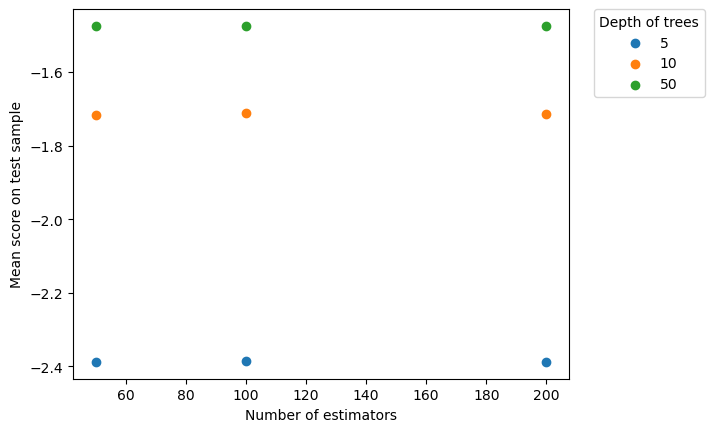

In [43]:
fig, ax = plt.subplots(1)

# Line plot
for max_leaf_nodes, group in perf_random_forest.groupby("param_regression__max_leaf_nodes"):
    x = group["param_regression__n_estimators"]
    y = group["mean_test_neg_root_mean_squared_error"]
    ax.scatter(x, y, label=f"{max_leaf_nodes}")

# Set labels and title
ax.set(xlabel='Number of estimators', ylabel='Mean score on test sample')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0,
           title='Depth of trees')
# Display the chart
plt.show()


In [44]:
y_pred = rfr.predict(X_test)

In [45]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Le RMSE sur le jeu de test est : {round(rmse, 4)}")

Le RMSE sur le jeu de test est : 1.6049


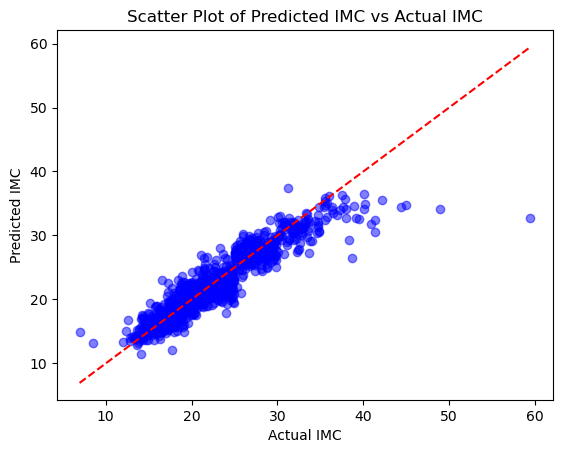

In [72]:
# Create the scatter plot
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)

# Add labels and title
plt.xlabel('Actual IMC')
plt.ylabel('Predicted IMC')
plt.title('Scatter Plot of Predicted IMC vs Actual IMC')

# Add a diagonal line for reference
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')

# Display the plot
plt.show()


# 4. SVM

In [52]:
from sklearn.svm import SVR


In [58]:
zero_imputer = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value=0)
minus_one_imputer = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value=-1)

numerical_zero = make_pipeline(zero_imputer, StandardScaler())
numerical_median = make_pipeline(median_imputer, StandardScaler())

categorical_encoder = make_pipeline(minus_one_imputer)

preprocessor = ColumnTransformer(
    transformers=[
        ("numerical_zero", numerical_zero, NUMERICAL_0_IMPUT),
        ("numerical_median", numerical_median, [x for x in NUMERICAL if x not in NUMERICAL_0_IMPUT]),
        ("categorical", categorical_encoder, CATEGORICAL)
    ]
)


In [68]:
pipeline_svr = Pipeline([
    ('preprocessor', preprocessor), 
    ('regression', SVR())
])

In [69]:
param_grid = {
    "regression__C": np.logspace(-8, 8, 9, base=2), 
    "regression__kernel": ["rbf"],
    "regression__gamma": [0.01],
}

In [70]:
pipe_gscv = GridSearchCV(pipeline_svr, 
                         param_grid=param_grid, 
                         scoring=["explained_variance", "r2", "neg_root_mean_squared_error"],
                         refit="neg_root_mean_squared_error",
                         cv=5, 
                         n_jobs=-1, 
                         verbose=1)

In [71]:
# Fit the pipeline to the training data
pipe_gscv.fit(X_train, y_train)

# Make predictions on the test data
y_pred = pipe_gscv.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
Mean Squared Error: 4.8231244120537085


In [ ]:
# Create the scatter plot
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)

# Add labels and title
plt.xlabel('Actual IMC')
plt.ylabel('Predicted IMC')
plt.title('Scatter Plot of Predicted IMC vs Actual IMC')

# Add a diagonal line for reference
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')

# Display the plot
plt.show()


# 5. XGboost

In [76]:
from xgboost import XGBRegressor

In [77]:
pipeline_xgb = Pipeline([
    ('preprocessor', preprocessor), 
    ('regression', XGBRegressor())
])

In [78]:
pipeline_xgb['regression'].get_params()


{'objective': 'reg:squarederror',
 'base_score': None,
 'booster': None,
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'feature_types': None,
 'gamma': None,
 'gpu_id': None,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': None,
 'max_bin': None,
 'max_cat_threshold': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': None,
 'max_leaves': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'n_estimators': 100,
 'n_jobs': None,
 'num_parallel_tree': None,
 'predictor': None,
 'random_state': None,
 'reg_alpha': None,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

In [83]:
param_grid = {
    "regression__max_leaves": [5, 10, 25],
    "regression__max_depth": [2, 3, 5],
    "regression__gamma": [0.1, 0.25, 0.5],
    "regression__n_estimators": [75, 150, 250],
}

In [84]:
pipe_gscv = GridSearchCV(pipeline_xgb, 
                         param_grid=param_grid, 
                         scoring=["explained_variance", "r2", "neg_root_mean_squared_error"],
                         refit="neg_root_mean_squared_error",
                         cv=5, 
                         n_jobs=-1, 
                         verbose=1)

In [85]:
# Fit the pipeline to the training data
pipe_gscv.fit(X_train, y_train)

# Make predictions on the test data
y_pred = pipe_gscv.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Fitting 5 folds for each of 81 candidates, totalling 405 fits
Mean Squared Error: 2.540212114598889


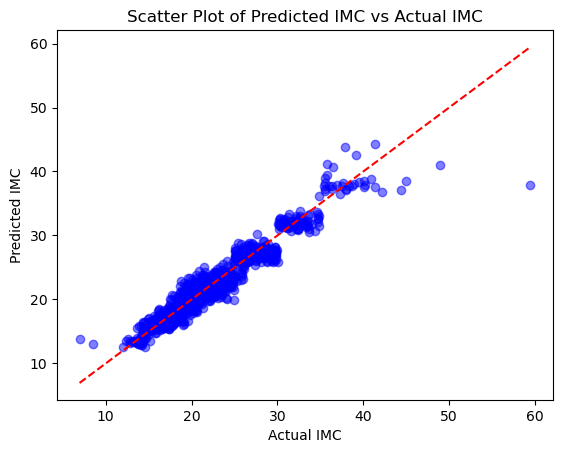

In [82]:
# Create the scatter plot
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)

# Add labels and title
plt.xlabel('Actual IMC')
plt.ylabel('Predicted IMC')
plt.title('Scatter Plot of Predicted IMC vs Actual IMC')

# Add a diagonal line for reference
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')

# Display the plot
plt.show()

# 6. KNeighbors

In [86]:
from sklearn.neighbors import KNeighborsRegressor

In [87]:
pipeline_knr = Pipeline([
    ('preprocessor', preprocessor), 
    ('regression', KNeighborsRegressor())
])

In [88]:
pipeline_knr['regression'].get_params()


{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [89]:
param_grid = {
    "regression__n_neighbors": [3, 4, 5, 6],
    "regression__p": [1, 2, 3],
}

In [90]:
pipe_gscv = GridSearchCV(pipeline_knr, 
                         param_grid=param_grid, 
                         scoring=["explained_variance", "r2", "neg_root_mean_squared_error"],
                         refit="neg_root_mean_squared_error",
                         cv=5, 
                         n_jobs=-1, 
                         verbose=1)

In [91]:
# Fit the pipeline to the training data
pipe_gscv.fit(X_train, y_train)

# Make predictions on the test data
y_pred = pipe_gscv.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Mean Squared Error: 10.888667489859625


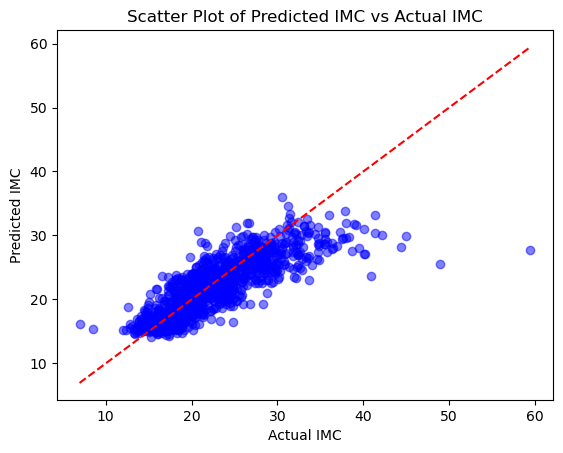

In [92]:
# Create the scatter plot
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)

# Add labels and title
plt.xlabel('Actual IMC')
plt.ylabel('Predicted IMC')
plt.title('Scatter Plot of Predicted IMC vs Actual IMC')

# Add a diagonal line for reference
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')

# Display the plot
plt.show()

# ANNEXES

In [4]:
list_var = [
"NOIND",
"imc",
"sex_PS",
"tage_PS",
"tage_PS_mois",
"diplome_interv",
"etude_4cl_interv",
"situ_prof_5cl_interv",
"atrav_interv",
"trav_nuit_interv",
"trav_nuit_2cl_interv",
"PCS_8cl_interv",
"PCS_4cl_interv",
"tps_travail_interv",
"vacances_interv",
"soins",
"situ_fin_3cl",
"revenu",
"RUC_4cl",
"nbpers",
"nbadu",
"nbenf",
"situ_alim_statut",
"IA_statut",
"IA_score",
"statnut",
"maladie_allergie_alim",
"intoall_confirm_med",
"regime_vegetarien",
"regime_allergie",
"regime_maigrir_med",
"regime_maigrir_choix",
"regime_autre_med",
"regime_poidsstable",
"regime_forme",
"regime_autreraison",
"regime_non",
"veget_viande",
"veget_prodmer",
"veget_prodlait",
"veget_oeuf",
"veget_miel",
"veget_autre_alim",
"allergie_laitvache",
"allergie_prepainfsoja",
"allergie_prepainfamande",
"allergie_gluten",
"allergie_farineble",
"allergie_lupin",
"allergie_arachide",
"allergie_fruitcoque",
"allergie_oeuf",
"allergie_poisson",
"allergie_crustace",
"allergie_mollusque",
"allergie_soja",
"allergie_sesame",
"allergie_moutarde",
"allergie_sulfite",
"allergie_celeri",
"allergie_autres_fruitleg",
"allergie_autresalim",
"allergie_nondetermine",
"allergie_fruits",
"allergie_legumes",
"regime_passe",
"regime_nb_2dernann",
"regime_nb_anter2dernann",
"regime_type" ,
"regime_duree_sem",
"regime_duree_mois",
"regime_duree_nsp" ,
"poids_modif",
"poids_modifalim",
"poids_plusAP",
"poids_medicaments",
"poids_substituts",
"poids_chirurgie",
"poids_modifalim_laityaourt",
"poids_modifalim_fromage",
"poids_modifalim_mg",
"poids_modifalim_fruit",
"poids_modifalim_legume",
"poids_modifalim_pdtfeculent",
"poids_modifalim_pizza",
"poids_modifalim_pain",
"poids_modifalim_vrouge",
"poids_modifalim_volaille",
"poids_modifalim_oeuf",
"poids_modifalim_gateau",
"poids_modifalim_edulcorant",
"poids_modifalim_pdtsalleges",
"poids_modifalim_BS",
"poids_modifalim_eau",
"poids_modifalim_autre",
"poids_perception" ,
"nb_prise_10kg",
"menopause",
"enceinte",
"enceinte_nbmois",
"allaite",
"allaite_nbsem",
"enceinte_12dermois",
"fume",
"nb_cigarettes_jour",
"nb_cigarettes_sem",
"nb_cigarettes_nsp",
"nb_cigares_jour",
"nb_cigares_sem",
"nb_cigares_nsp",
"nb_pipes_jour",
"nb_pipes_sem",
"nb_pipes_nsp",
"fume_age_debut",
"fume_age_debut_nsp",
"fume_age_arret",
"fume_age_arret_nsp",
"bmr_kcal"]


In [5]:
new_data = desc_indiv[list_var]

In [6]:
new_data = new_data.dropna(subset=['imc'])

In [7]:
new_data.to_parquet("description_individu_inca.parquet")